Implement a linear regression model to predict housing prices based on a given dataset.


**Expected Output:**


Load a dataset the Boston Housing dataset.


Train a linear regression model.


Print the model's coefficients and intercept.


Predict housing prices on a test set and print the mean squared error.


Visualize the regression line and data points.


In [65]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

--2024-06-24 02:57:15--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49081 (48K) [text/plain]
Saving to: ‘housing.data’

housing.data        100%[===================>]  47.93K  --.-KB/s    in 0.007s  

2024-06-24 02:57:15 (6.25 MB/s) - ‘housing.data’ saved [49081/49081]



# New Section

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [75]:
# Load the data from a CSV file
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('boston_housing.csv', delim_whitespace=True, header=None)

print(data.head(5)) #first 5 entries
print(np.shape(data))


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
(506, 14)


In [76]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# Create and train the linear regression model
model = LinearRegression()
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


model.fit(X_train, y_train)


X_train shape: (404, 13)
y_train shape: (404,)
X_test shape: (102, 13)
y_test shape: (102,)


LinearRegression()

In [78]:
# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 30.24675099392366


**TESTING THE MODEL**

In [79]:
# Predict housing prices on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 24.291119474973478


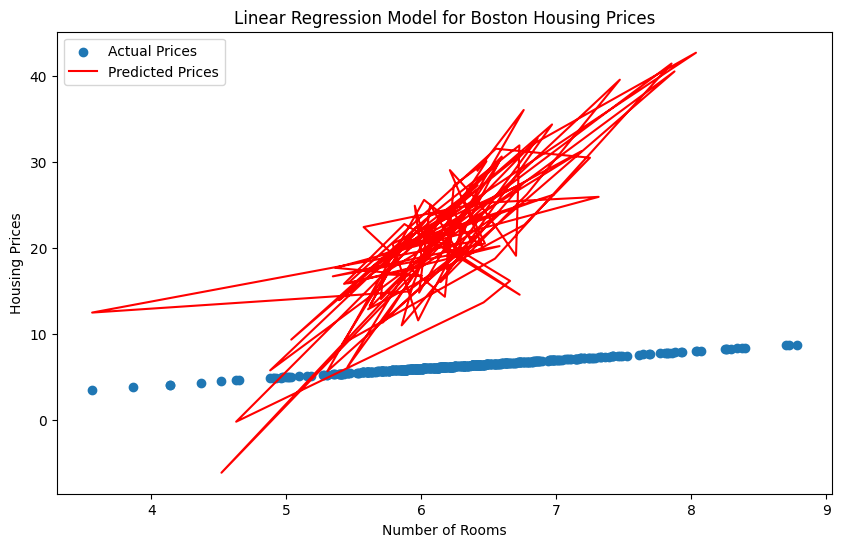

In [80]:
# Visualize the regression line and data points
plt.figure(figsize=(10, 6))
plt.scatter(data[5], data[5], label='Actual Prices')
plt.plot(X_test[5], y_pred, color='r', label='Predicted Prices')
plt.xlabel('Number of Rooms')
plt.ylabel('Housing Prices')
plt.title('Linear Regression Model for Boston Housing Prices')
plt.legend()
plt.show()